---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Classifier Visualization Playground

The purpose of this notebook is to let you visualize various classsifiers' decision boundaries.

The data used in this notebook is based on the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. 

In order to better vizualize the decision boundaries, we'll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions. Dimensionality reduction will be covered in a later module of this course.

Play around with different models and parameters to see how they affect the classifier's decision boundary and accuracy!

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Abre archivo de datos y crea una df
df = pd.read_csv('readonly/mushrooms.csv')

# Dado que las variables son categóricas, genera columnas con 0 y 1 para cada variable de cada columna
# Como resultado se obtiene una matriz compuesta por 0 y 1 y se agregan varias columnas, una por cada variable categórica 
# y sus valores
# https://www.sharpsightlabs.com/blog/pandas-get-dummies/
# Esto se hace porque algunos clasificadores solo puede trabajar con valores numéricos y no categóricos
df2 = pd.get_dummies(df)

# Extrae un sample con el 8% de los datos, o sea, 650 muestras
df3 = df2.sample(frac=0.08)

# Genero las df con los features: selecciono todas las filas y desde la 2da col hasta el final
X = df3.iloc[:,2:]
X_todos = df2.iloc[:,2:]
# Genero la df con las categorías: 1 es class_p (poisonous)y 0 es class_e (edible) 
# de la df3 se selecciona solo la primera columna que contiene las clases
y = df3.iloc[:,1]
y_todos = df2.iloc[:,1]

# Crea el objeto PCA y calcula dos componentes para cada uno de los 650 hongos
# Luego hace fit del modelo con la df X(features) y aplica la reducción dimensional en df X.
# Como resultado se obtiene una df de shape(650, 2), cada columna es uno de los dos PCs.
pca = PCA(n_components=2).fit_transform(X)
pca_todos = PCA(n_components=2).fit_transform(X_todos)


<IPython.core.display.Javascript object>


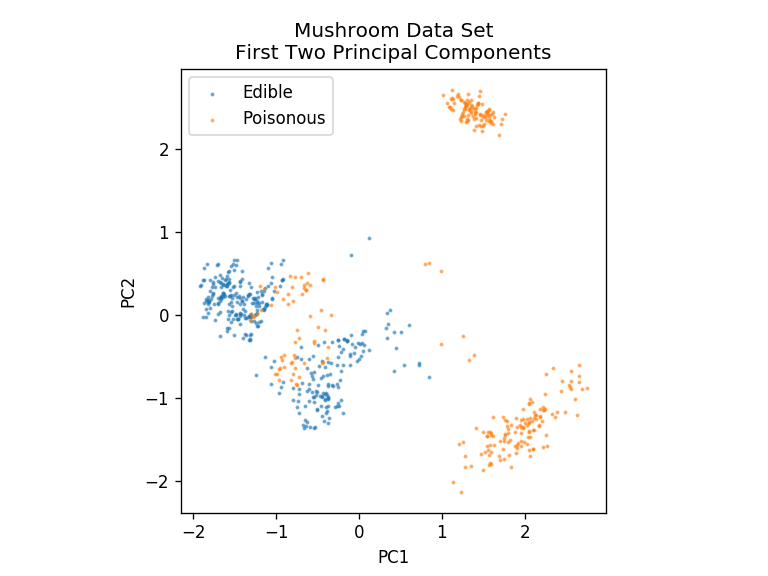

In [2]:
# Graficamos
plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2) # selecciono de pca aquellas filas donde los hongos son comestibles (bool mask con y=0) y luego selecciono la primera columna, o sea PC1
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2) # selecciono de pca aquellas filas donde los hongos son comestibles (bool mask con y=0) y selecciono la primera columna, o sea PC2

plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

<IPython.core.display.Javascript object>


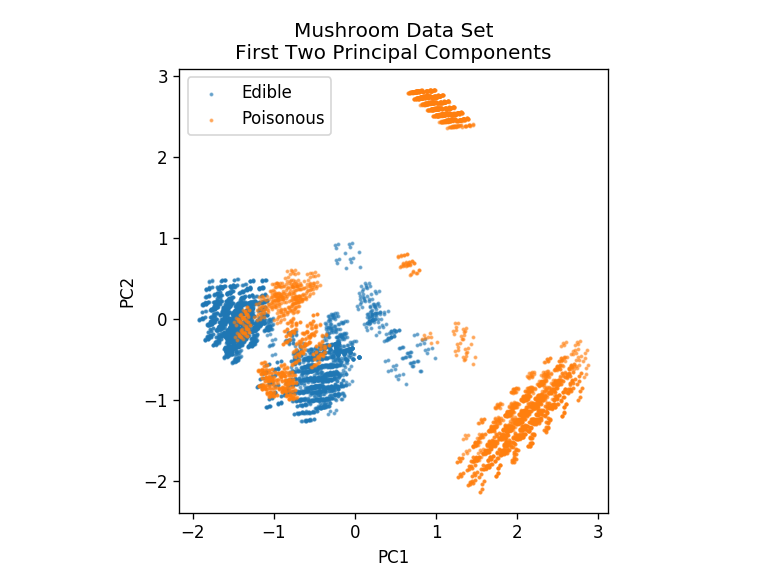

In [3]:
# Graficamos pero usando todos los datos del UCI Mushroom Data Set 
plt.figure(dpi=120)
plt.scatter(pca_todos[y_todos.values==0,0], pca_todos[y_todos.values==0,1], alpha=0.5, label='Edible', s=2) # selecciono de pca aquellas filas donde los hongos son comestibles (bool mask con y=0) y luego selecciono la primera columna, o sea PC1
plt.scatter(pca_todos[y_todos.values==1,0], pca_todos[y_todos.values==1,1], alpha=0.5, label='Poisonous', s=2) # selecciono de pca aquellas filas donde los hongos son comestibles (bool mask con y=0) y selecciono la primera columna, o sea PC2

plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

In [4]:
# Se generan los set de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


In [5]:
# Definimos función para graficar los distinto métodos clasificadores

def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        # Esta linea es la que genera los boundaries y las probabilidades
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

### Vamos a graficar los distintos métodos de clasificación

<IPython.core.display.Javascript object>


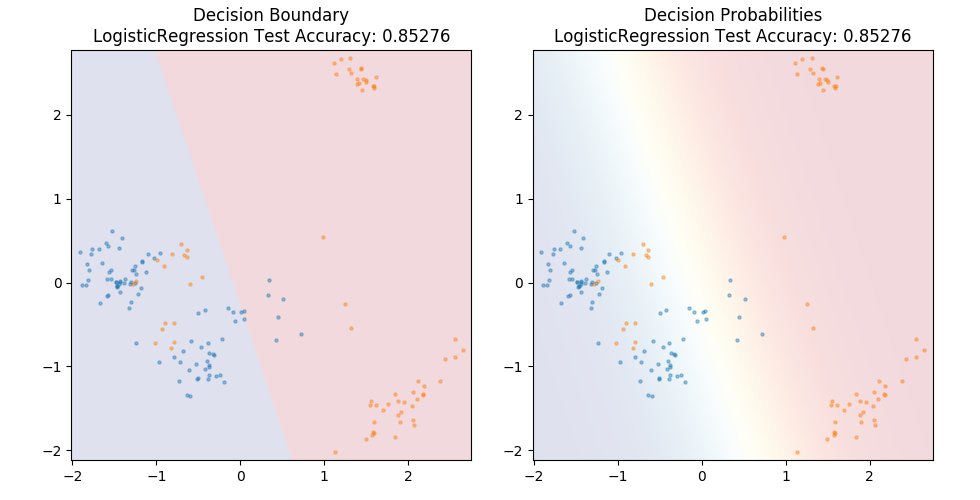

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


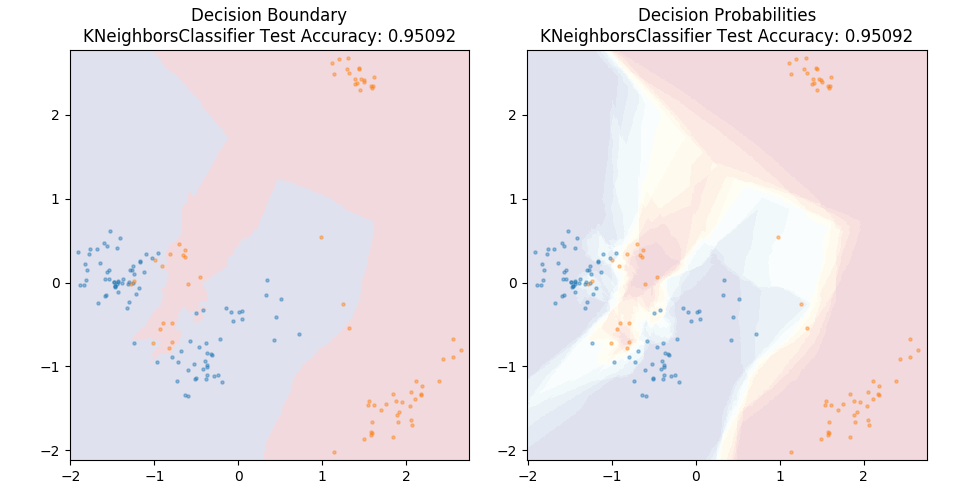

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


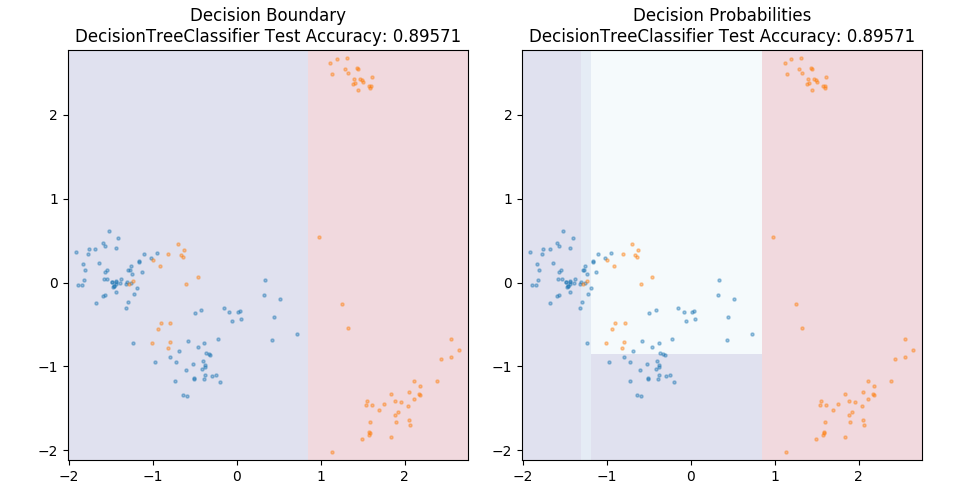

In [8]:
# Acá usamos un DecisionTree con un poco de pruning porque definimos un max_depth=3

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


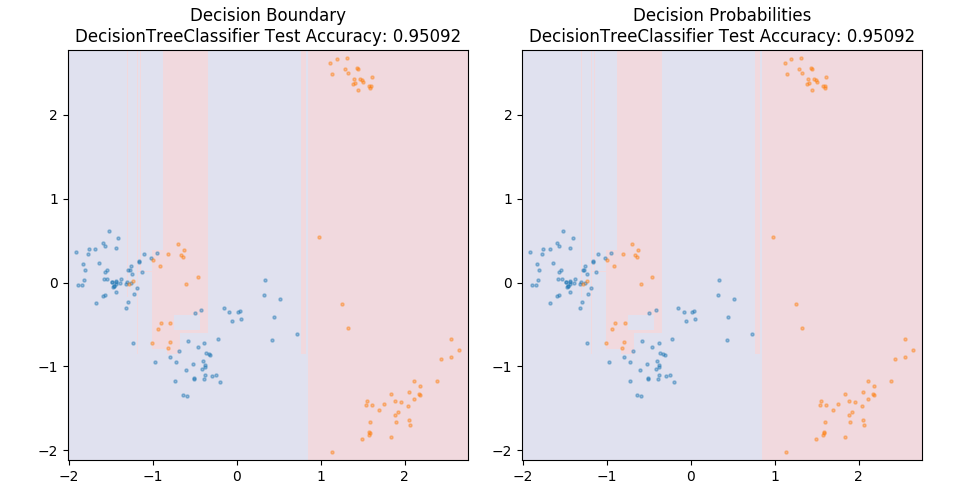

In [9]:
# Decision Tree sin pruning, por ende es más complejo

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


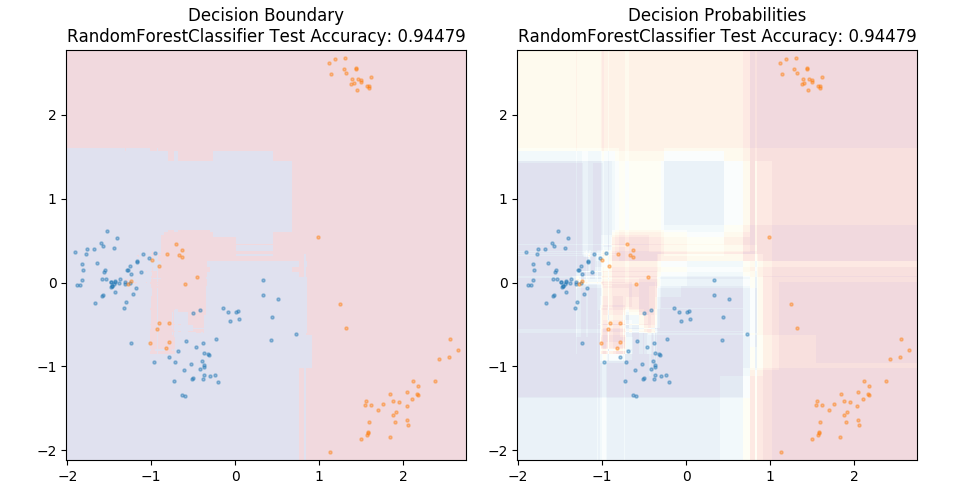

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


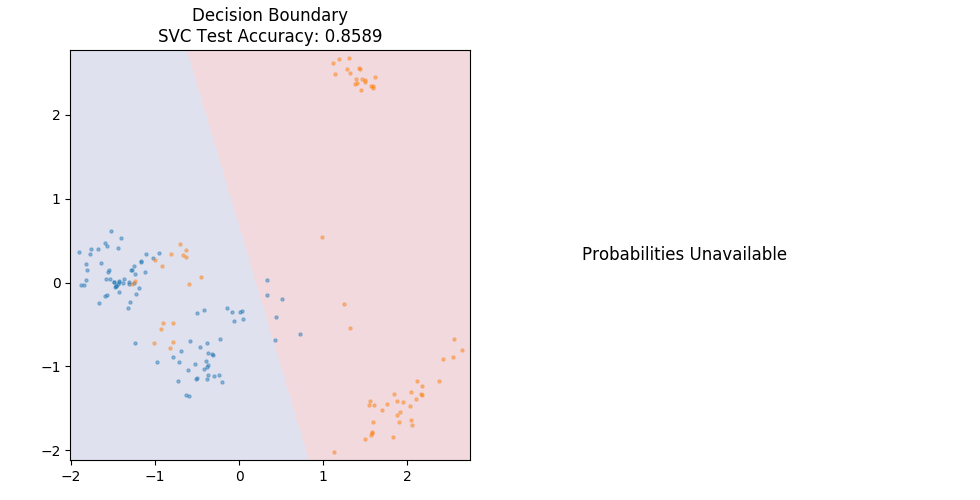

In [11]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


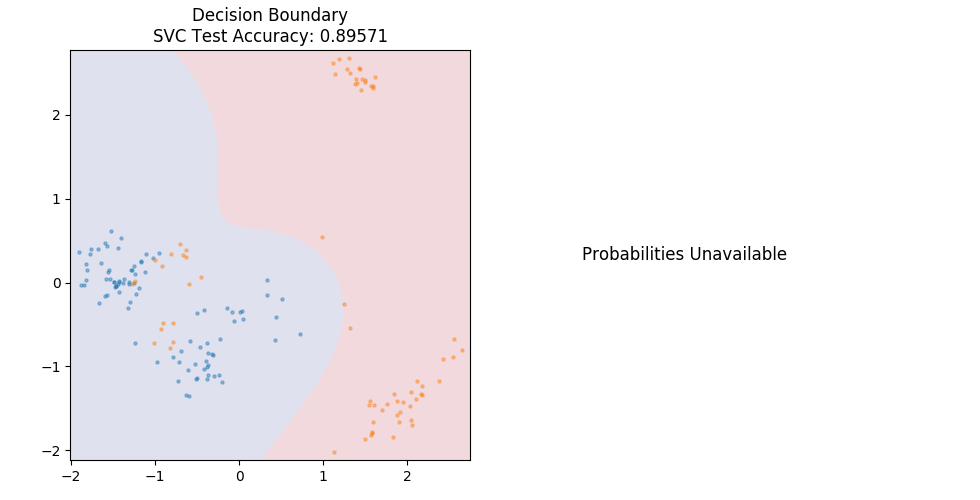

In [12]:


from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


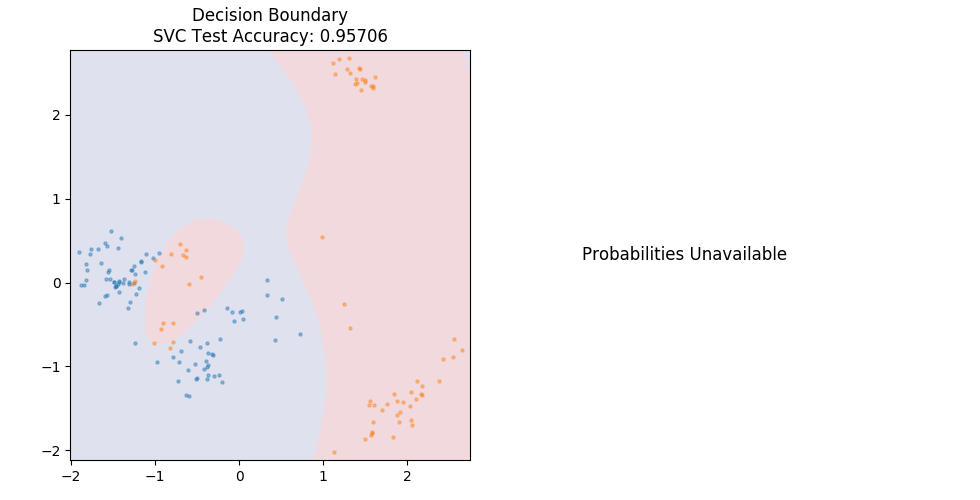

In [13]:
# Es el mismo SVC de arriba pero se le otorga un C=10
# al aumentar el C hay menor regularización por lo que logra detectar grupos más pequeños y específicos, aumentando el accuracy

from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


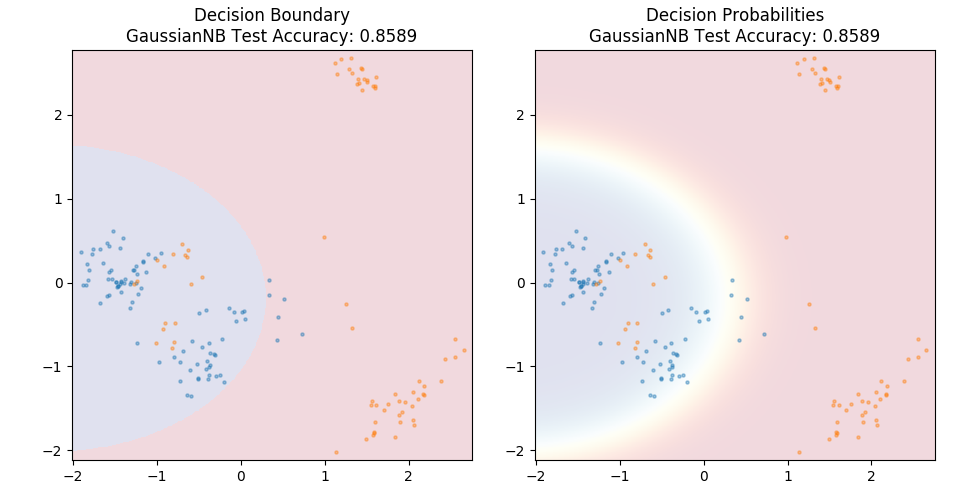

In [14]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


<IPython.core.display.Javascript object>


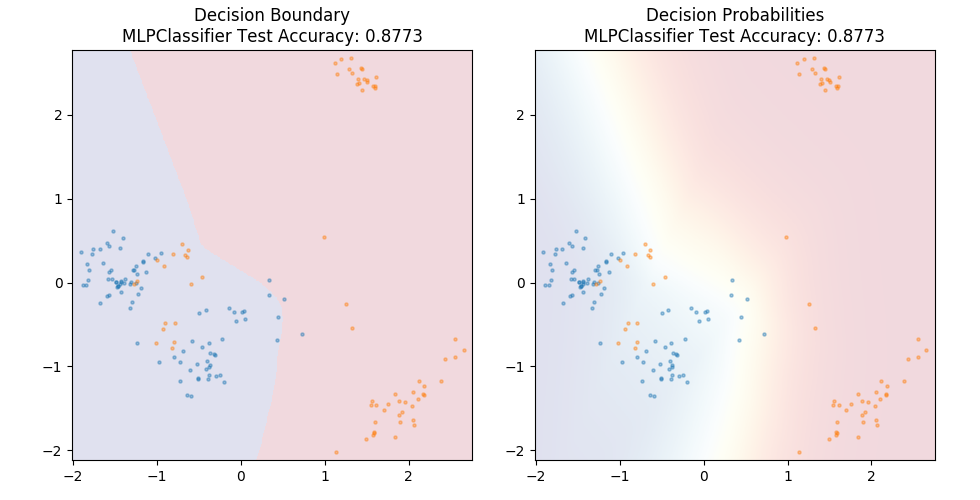

In [15]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)